In [4]:
get_ipython().system('pip install tensorflow')


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [6]:
# ## Reading the dataset
tg=pd.read_csv("stock.csv")

In [7]:
tg

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [8]:
# Data exploration techniques

tg.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [9]:
tg.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [10]:
tg.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [11]:
# ### Sorting the data
# #### Checking for null values

NAN=[{c,tg[c].isnull().mean()*100}for c in tg]
NAN=pd.DataFrame(NAN,columns=['column name','percentage'])
NAN

,column name,percentage
0,0.0,date
1,open,0.001777
2,0.001292,high
3,0.001292,low
4,0.0,close
5,0.0,volume
6,0.0,Name


In [12]:
srt=tg.sort_values(by='date')
srt

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.1200,14.630,14.75,8407500,AAL
508224,2013-02-08,81.22,81.9300,80.940,81.89,296853,SLG
506965,2013-02-08,78.24,79.0700,78.125,79.07,4632684,SLB
85755,2013-02-08,236.64,238.6924,235.750,238.16,552207,BLK
505706,2013-02-08,89.04,89.4800,88.910,89.16,554948,SJM
...,...,...,...,...,...,...,...
147509,2018-02-07,53.38,54.3600,52.940,52.97,6496219,CSX
31474,2018-02-07,107.46,109.4800,106.560,106.63,1668253,ALB
241494,2018-02-07,10.75,11.0400,10.700,10.76,68041787,F
42609,2018-02-07,176.25,180.9900,176.000,177.47,5715671,AMGN


In [13]:
srt.reset_index(inplace=True)

In [14]:
srt.head()

,index,date,open,high,low,close,volume,Name
0,0,2013-02-08,15.07,15.1200,14.630,14.75,8407500,AAL
1,508224,2013-02-08,81.22,81.9300,80.940,81.89,296853,SLG
2,506965,2013-02-08,78.24,79.0700,78.125,79.07,4632684,SLB
3,85755,2013-02-08,236.64,238.6924,235.750,238.16,552207,BLK
4,505706,2013-02-08,89.04,89.4800,88.910,89.16,554948,SJM


(0.0, 7.0)

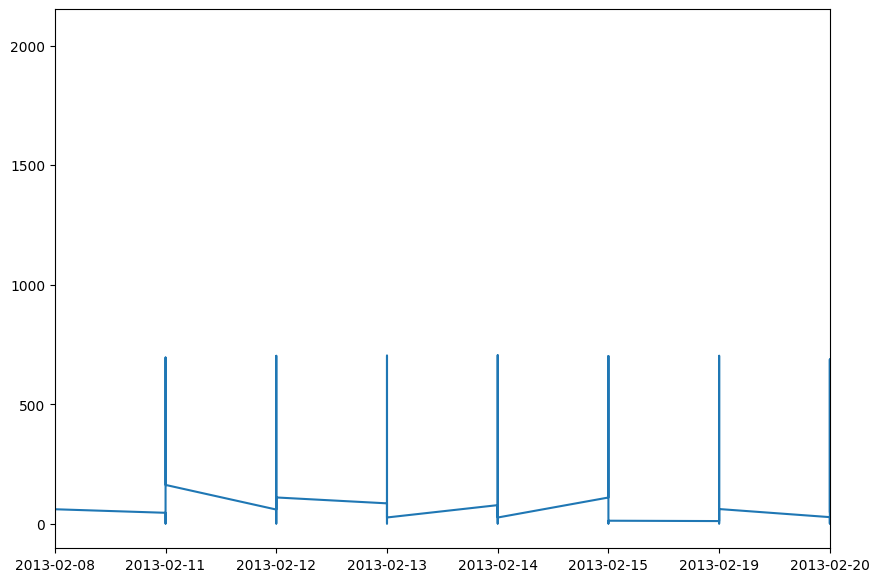

In [15]:
# ### Data visualization

# #### Plotting the graph for data and close

plt.figure(figsize=(10,7))
plt.plot(srt['date'],srt['close'])
plt.xlim(0,7)

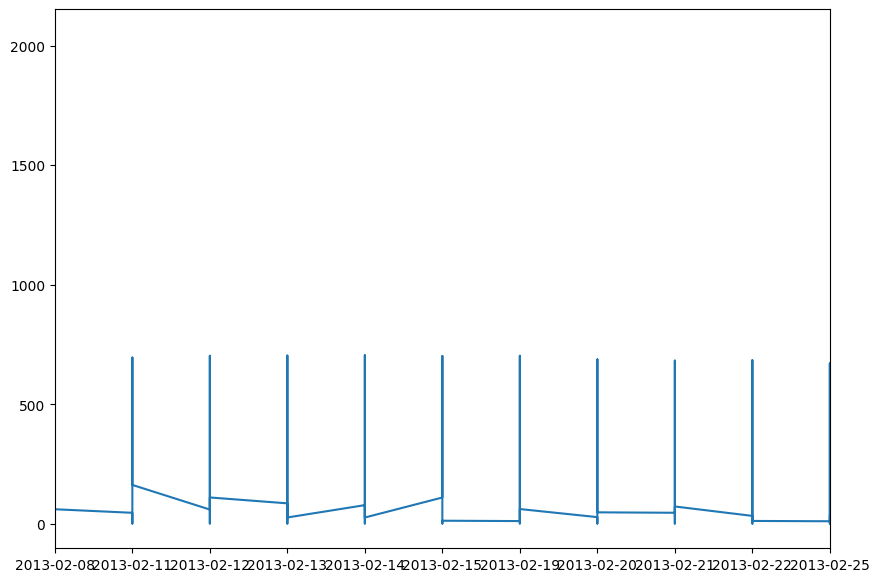

In [16]:
plt.figure(figsize=(10,7))
plt.xlim(0,10)
plt.plot(srt['date'],srt['close'])

In [17]:
close_srt=srt['close']
close_srt

0          14.75
1          81.89
2          79.07
3         238.16
4          89.16
           ...  
619035     52.97
619036    106.63
619037     10.76
619038    177.47
619039     73.86
Name: close, Length: 619040, dtype: float64

In [18]:
# ### Feature scaling(MinMax Scaler)

scaler=MinMaxScaler(feature_range=(0,1))
close_srt=scaler.fit_transform(np.array(close_srt).reshape(-1,1))
close_srt

array([[0.00642763],
       [0.03922028],
       [0.03784293],
       ...,
       [0.00447883],
       [0.08590365],
       [0.03529825]])

In [19]:
# ### Splitting the dataset

train_size=int(len(close_srt)*0.7)
test_size=len(close_srt)-train_size
train_data,test_data=close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]

In [20]:
train_data.shape

(433328, 1)

In [21]:
test_data.shape

(185712, 1)

In [22]:
# ### convert an array of values into a dataset matrix

def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)   


In [23]:
# #### Reshaping of dataset
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [24]:
print(X_train.shape),print(y_train.shape)

(433227, 100)
(433227,)


(None, None)

In [25]:
print(X_test.shape),print(y_test.shape)

(185611, 100)
(185611,)


(None, None)

In [26]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [27]:
X_train

array([[[0.00642763],
        [0.03922028],
        [0.03784293],
        ...,
        [0.0337988 ],
        [0.0030966 ],
        [0.01827675]],

       [[0.03922028],
        [0.03784293],
        [0.11554598],
        ...,
        [0.0030966 ],
        [0.01827675],
        [0.05746284]],

       [[0.03784293],
        [0.11554598],
        [0.04277111],
        ...,
        [0.01827675],
        [0.05746284],
        [0.00613946]],

       ...,

       [[0.04309835],
        [0.19990134],
        [0.02534255],
        ...,
        [0.01187842],
        [0.02484602],
        [0.00225163]],

       [[0.19990134],
        [0.02534255],
        [0.01709965],
        ...,
        [0.02484602],
        [0.00225163],
        [0.05262258]],

       [[0.02534255],
        [0.01709965],
        [0.01931709],
        ...,
        [0.00225163],
        [0.05262258],
        [0.02410362]]])

In [28]:
X_test

array([[[0.04366492],
        [0.0350052 ],
        [0.05444928],
        ...,
        [0.04363562],
        [0.02537352],
        [0.04668337]],

       [[0.0350052 ],
        [0.05444928],
        [0.02050395],
        ...,
        [0.02537352],
        [0.04668337],
        [0.04399705]],

       [[0.05444928],
        [0.02050395],
        [0.08688538],
        ...,
        [0.04668337],
        [0.04399705],
        [0.01583952]],

       ...,

       [[0.01996181],
        [0.01557089],
        [0.01515573],
        ...,
        [0.01315809],
        [0.02598893],
        [0.02509512]],

       [[0.01557089],
        [0.01515573],
        [0.04200917],
        ...,
        [0.02598893],
        [0.02509512],
        [0.05130384]],

       [[0.01515573],
        [0.04200917],
        [0.01160979],
        ...,
        [0.02509512],
        [0.05130384],
        [0.00447883]]])

In [29]:
# ### Creating the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam') #MSE is used for regressions to measure the diff btw predicted values and Actual values.


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# ### Prediction and checking performance

model.fit(X_train,y_train,validation_split=0.1,epochs=1,batch_size=64,verbose=1)

6093/6093 [==============================] - 1860s 304ms/step - loss: 0.0016 - val_loss: 0.0024


In [33]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

5801/5801 [==============================] - 362s 62ms/step


In [34]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
# ### Calculating the performance
import math
from sklearn.metrics import mean_squared_error

In [36]:
math.sqrt(mean_squared_error(y_train,train_predict))

74.86182231163595

In [37]:
math.sqrt(mean_squared_error(y_test,test_predict))

75.93173693477148

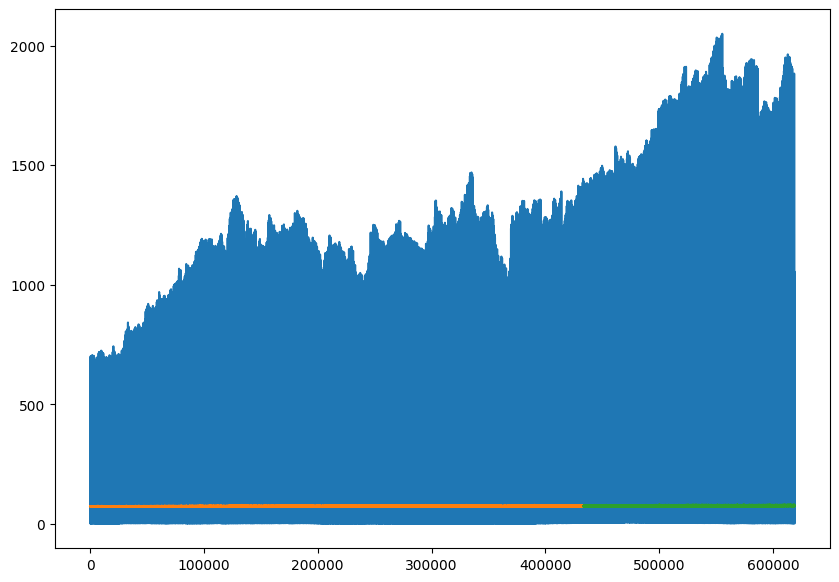

In [38]:
# #### Plotting the graph with predicted train data,test data with actual data


look_back=100

trainPredictPlot=np.empty_like(close_srt)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

testPredictPlot=np.empty_like(close_srt)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1,:]=test_predict

plt.figure(figsize=(10,7))
plt.plot(scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

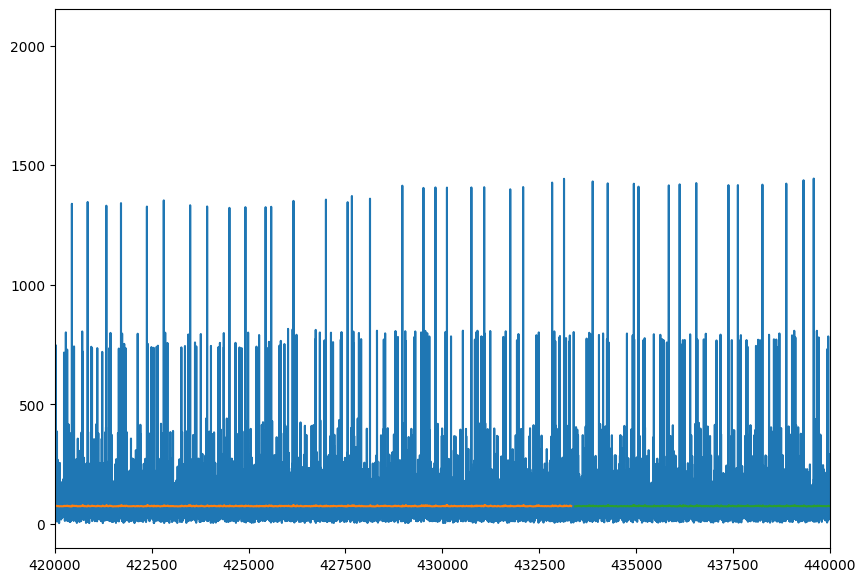

In [39]:


look_back=100

trainPredictPlot=np.empty_like(close_srt)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

testPredictPlot=np.empty_like(close_srt)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1,:]=test_predict

plt.figure(figsize=(10,7))
plt.xlim(420000,440000)
plt.plot(scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [40]:
# #### Prediction for next 30 days
len(test_data)

185712

In [41]:
pred_input=test_data[511:].reshape(1,-1)
pred_input.shape

(1, 185201)

In [42]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()

In [43]:
temp_input


[0.020713975217469874,
 0.18897533957536594,
 0.015412154868834283,
 0.01530225992839734,
 0.01561973420077073,
 0.05242721291778393,
 0.05094729438656644,
 0.018906813974729045,
 0.02488998295407368,
 0.17813725633849595,
 0.045730947880492916,
 0.02038184828637156,
 0.01630840916084223,
 0.01370023590780547,
 0.03783804904733297,
 0.03068755158956926,
 0.02278976853683434,
 0.021489686970367437,
 0.054717911898447304,
 0.04693735011551179,
 0.05561172408066777,
 0.01888239287685417,
 0.19669240650382677,
 0.04314231150575605,
 0.026648302001064755,
 0.015014090973473802,
 0.016415861991491688,
 0.030829193957243536,
 0.016977547242613838,
 0.09312253041647739,
 0.012933413434534361,
 0.0039562178557299215,
 0.06163396681661221,
 0.030355424658470943,
 0.005069819918824271,
 0.006266453714693197,
 0.029168559301751967,
 0.007160265896913661,
 0.01476987999472504,
 0.01037408237724735,
 0.015907903155694264,
 0.6986436522240292,
 0.08128806638631246,
 0.031639974406689426,
 0.007428897

In [44]:
lst_output = []
n_steps = 100  # Adjust this value based on the number of time steps in your input data
i = 0

while i < 30:
    if len(temp_input) > n_steps:
        pred_input = np.array(temp_input[-n_steps:])  # Adjusted line
        print("{} day input {}".format(i, pred_input))
        pred_input = pred_input.reshape(1, n_steps, 1)

        yhat = model.predict(pred_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i += 1
    else:
        pred_input = np.array(temp_input)
        pred_input = pred_input.reshape(1, len(temp_input), 1)  # Adjusted line
        yhat = model.predict(pred_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)

0 day input [0.01160979 0.01361232 0.03604066 0.02530514 0.08359342 0.03500032
 0.02235996 0.04492994 0.03101479 0.01623026 0.0444464  0.02732721
 0.02125124 0.08956682 0.03928378 0.05644204 0.03044334 0.02875828
 0.02342472 0.03246541 0.01161467 0.05182645 0.15888366 0.03329084
 0.05732609 0.12615939 0.11097435 0.12234482 0.06891145 0.04091999
 0.01244988 0.0063153  0.06828139 0.01155606 0.06892122 0.0491499
 0.01179539 0.03544478 0.10951886 0.02440156 0.02787913 0.16793901
 0.09265365 0.04217035 0.05088868 0.01209821 0.02252114 0.00860111
 0.00994916 0.04728413 0.11179002 0.05291563 0.09316649 0.0133388
 0.03184511 0.02522699 0.11568274 0.06185864 0.03514684 0.35495577
 0.0576631  0.08559106 0.00063495 0.12479669 0.01898008 0.05468861
 0.03349598 0.03277311 0.08244563 0.01806184 0.05683278 0.01951734
 0.16414397 0.04872497 0.05553358 0.05775101 0.12995443 0.05115243
 0.01521434 0.04615099 0.01582976 0.01973713 0.03908841 0.03669514
 0.04751857 0.03644116 0.02650666 0.07800099 0.02862

1 day output [[0.0361287]]
2 day input [0.03604066 0.02530514 0.08359342 0.03500032 0.02235996 0.04492994
 0.03101479 0.01623026 0.0444464  0.02732721 0.02125124 0.08956682
 0.03928378 0.05644204 0.03044334 0.02875828 0.02342472 0.03246541
 0.01161467 0.05182645 0.15888366 0.03329084 0.05732609 0.12615939
 0.11097435 0.12234482 0.06891145 0.04091999 0.01244988 0.0063153
 0.06828139 0.01155606 0.06892122 0.0491499  0.01179539 0.03544478
 0.10951886 0.02440156 0.02787913 0.16793901 0.09265365 0.04217035
 0.05088868 0.01209821 0.02252114 0.00860111 0.00994916 0.04728413
 0.11179002 0.05291563 0.09316649 0.0133388  0.03184511 0.02522699
 0.11568274 0.06185864 0.03514684 0.35495577 0.0576631  0.08559106
 0.00063495 0.12479669 0.01898008 0.05468861 0.03349598 0.03277311
 0.08244563 0.01806184 0.05683278 0.01951734 0.16414397 0.04872497
 0.05553358 0.05775101 0.12995443 0.05115243 0.01521434 0.04615099
 0.01582976 0.01973713 0.03908841 0.03669514 0.04751857 0.03644116
 0.02650666 0.07800099 0

In [47]:
plt.lst_output

AttributeError: module 'matplotlib.pyplot' has no attribute 'lst_output'

In [48]:
# #### Plotting last 130 days closing price

day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [49]:
len(close_srt)

619040

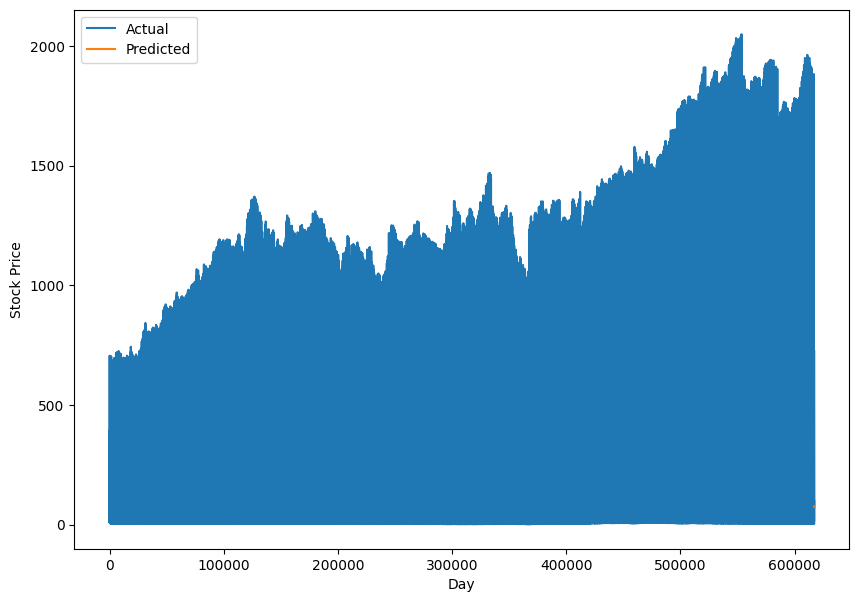

In [50]:

plt.figure(figsize=(10, 7))
day_new = np.arange(1, len(close_srt[1935:]) + 1)
day_pred = np.arange(len(close_srt[1935:]) + 1, len(close_srt[1935:]) + len(lst_output) + 1)
plt.plot(day_new, scaler.inverse_transform(close_srt[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [51]:
# #### Appending in a list is done to make continous graph



df3=close_srt.tolist()
df3.extend(lst_output)
print(len(df3))

619070


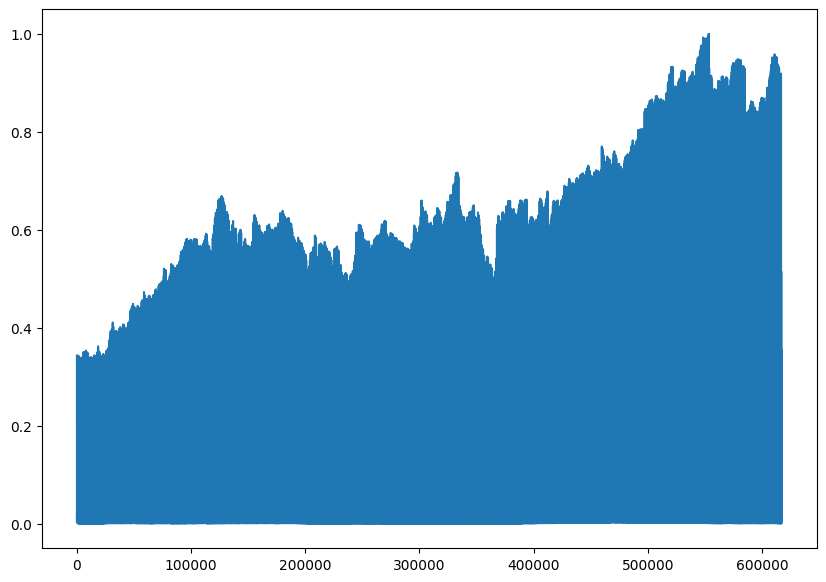

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(df3[1935:])

In [52]:
df3=scaler.inverse_transform(df3).tolist()

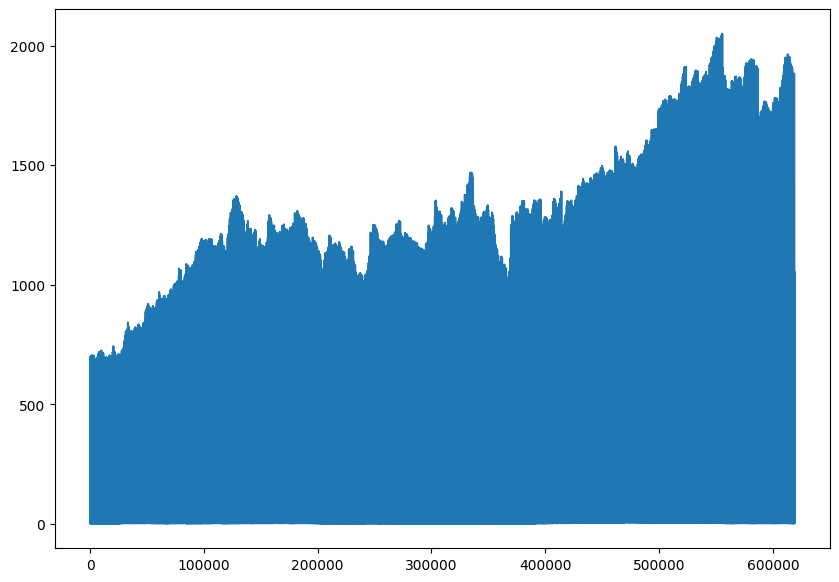

In [53]:
plt.figure(figsize=(10,7))
plt.plot(df3)